In [2]:
import pandas as pd
import numpy as np

In [3]:
sample = pd.read_csv('sample.csv', low_memory = False)

In [4]:
sample

,Unnamed: 0,outlook,temp,humidity,windy,play
0,0,overcast,hot,high,False,yes
1,1,overcast,cool,normal,True,yes
2,2,overcast,mild,high,True,yes
3,3,overcast,hot,normal,False,yes
4,4,rainy,mild,high,False,yes
5,5,rainy,cool,normal,False,yes
6,6,rainy,cool,normal,True,no
7,7,rainy,mild,normal,False,yes
8,8,rainy,mild,high,True,no
9,9,sunny,hot,high,False,no


In [5]:
sample = sample.iloc[:, 1:]

In [6]:
sample

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [7]:
len(sample.loc[sample.play == 'yes', :]) / len(sample)

0.6428571428571429

In [8]:
len(sample.loc[sample.play == 'no', :]) / len(sample)

0.35714285714285715

In [9]:
pk_yes = np.sum(sample.play == 'yes') / len(sample)
pk_no = np.sum(sample.play == 'no') / len(sample)

In [10]:
-(pk_yes*np.log2(pk_yes) + pk_no*np.log2(pk_no))

0.9402859586706311

In [11]:
overcast = sample.loc[sample.outlook == 'overcast', :]

In [12]:
def entropy(x):
    px = np.unique(x, return_counts=True)[1]/len(x)
    entropy_ = -np.sum(px*np.log2(px))
    return entropy_

In [13]:
entropy(sample.play)

0.9402859586706311

In [14]:
entropy([1, 1, 1, 2, 2, 2, 2, 2])

0.954434002924965

In [15]:

#y = play
total = entropy(sample.play)
#x = sample 독립변수

In [16]:
vals, counts = np.unique(sample.outlook,return_counts=True)

In [17]:
a1 = counts[0]/len(sample)*entropy(sample.loc[sample.outlook == vals[0], 'play'])

In [18]:
a2 = counts[1]/len(sample)*entropy(sample.loc[sample.outlook == vals[1], 'play'])

In [19]:
a3 = counts[2]/len(sample)*entropy(sample.loc[sample.outlook == vals[2], 'play'])

In [20]:
a1 + a2 + a3

0.6935361388961918

In [21]:
total

0.9402859586706311

In [22]:
total - (a1 + a2 + a3)

0.24674981977443933

In [23]:
def info_gain(data, x, y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x], return_counts=True)
    gain = [ count/len(data)*entropy(data.loc[data[x] == val, y]) for val, count in zip(vals, counts) ]
    return total - np.sum(gain)

In [24]:
info_gain(sample, 'outlook', 'play')

0.24674981977443933

In [ ]:
def get_info(data, x, y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x], return_counts=True)
    gain = [for val, count in zip(vals, counts)]
    

In [39]:
# data = sample
# 종속변수(y) = play
# 선택변수(x) = temp
# np.unique(sample.temp)

x1 = sample.loc[sample['temp'] == np.unique(sample.temp)[0],'play']
count_x1 = len(x1)
x2 = sample.loc[sample['temp'] == np.unique(sample.temp)[1],'play']
count_x2 = len(x2)
x3 = sample.loc[sample['temp'] == np.unique(sample.temp)[2],'play']
count_x3 = len(x3)

px1 = count_x1/len(sample)
px2 = count_x2/len(sample)
px3 = count_x3/len(sample)


entropy(x1), entropy(x2), entropy(x3), count_x1, count_x2, count_x3

gain = [entropy(x1)*px1, entropy(x2)*px2, entropy(x3)*px3]
np.sum(gain)

0.9110633930116763

In [40]:
gain = []
for val in np.unique(sample.temp):
    x = sample.loc[sample['temp'] == val, 'play']
    count_x = len(x)
    px = count_x/len(sample)
    gain.append(px*entropy(x))
np.sum(gain)

0.9110633930116763

In [228]:
def get_gain(data,x,y):
    total_info = entropy(data[y])
    gain = []
    for val in np.unique(data[x]):
        info = data.loc[data[x] == val,y]
        count = len(info)
        px = count/len(data)
        gain.append(px*entropy(info))
    return total_info - np.sum(gain)

In [102]:
get_gain(sample, 'temp', 'play')

0.02922256565895487

In [103]:
aa = []
features = sample.columns[:-1]
for i in features:
    aa.append(get_gain(sample, i, 'play'))
features[np.argmax(aa)]

'outlook'

In [122]:
def max_gain(data, x, y):
    return x[np.argmax([get_gain(data, i, y) for i in x])]

In [229]:
data = sample
x = sample.columns[:-1]
y = sample.columns[-1]
best_feature = max_gain(data,x,y)

In [230]:
best_feature

'outlook'

In [126]:
tree = {best_feature:{}}

In [127]:
tree

{'outlook': {}}

In [109]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    tree = {best_feature:{}}
    return tree

In [110]:
make_tree(data, x, y)

{'outlook': {}}

In [69]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    columns = x[ x != best_feature]
    tree = {best_feature:{}}
    count = []
    for val in np.unique(data[best_feature]): # overcast, sunny, rainy
        sub_data = data.loc[data[best_feature] == val,:]
        count.append((val,len(sub_data)))
    return count

In [70]:
make_tree(data, x, y)

[('overcast', 4), ('rainy', 5), ('sunny', 5)]

In [130]:
def make_tree(data, x, y):
    best_feature = max_gain(data, x, y)
    columns = x[ x != best_feature ]
    tree = {best_feature:{}}
    for val in np.unique(data[best_feature]): #overcast, sunny, rainy
        sub_data = data.loc[data[best_feature] == val, :]
        sub_tree = make_tree(sub_data, columns, y)
        tree[best_feature][val] = sub_tree
    return tree

In [158]:
data.loc[data[best_feature] == val, :]

,outlook,temp,humidity,windy,play
9,sunny,hot,high,False,no
10,sunny,hot,high,True,no
11,sunny,mild,high,False,no
12,sunny,cool,normal,False,yes
13,sunny,mild,normal,True,yes


In [231]:
def make_tree(data,x,y,parent_class=None):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        elif len(data) == 0:
            return 'case_1'
        elif len(x) == 0:
            return parent_class
        best_feature = max_gain(data,x,y)
        columns = x[ x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            vals, counts = np.unique(data.loc[data[best_feature] == val,y],return_counts=True)
            parent_class = vals[np.argmax(counts)]
            sub_data = data.loc[data[best_feature] == val,:]
            sub_tree = make_tree(sub_data,columns,y,parent_class)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [232]:
make_tree(data, x, y)

{'outlook': {'overcast': 'yes',
  'rainy': {'windy': {False: 'yes', True: 'no'}},
  'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}

In [62]:
for val in np.unique(data[best_feature]):
    print(val)
vals = [val for val in np.unique(data[best_feature])]

overcast
rainy
sunny


In [63]:
data.loc[data[best_feature] == vals[0], :]

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


In [65]:
tree['outlook'] = {'overcast'}

In [66]:
tree

{'outlook': {'overcast'}}

In [164]:
data.windy.dtype

dtype('bool')

In [165]:
data

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [166]:
x = data.columns[:-1]
y = data.columns[-1:]

In [169]:
import pprint

In [170]:
test_data = np.array(['overcast','cool','high','False'])

In [171]:
tree2['outlook'][test_data[0]]['temp'][test_data[1]]

array(['overcast', 'cool', 'high', 'False'], dtype='<U8')

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [199]:
model = DecisionTreeClassifier()

In [200]:
le_outlook = LabelEncoder().fit(data.outlook)
le_temp = LabelEncoder().fit(data.temp)
le_humidity = LabelEncoder().fit(data.humidity)
le_windy = LabelEncoder().fit(data.windy)

In [201]:
X = np.c_[le_outlook.transform(data.outlook),
     le_temp.transform(data.temp),
     le_humidity.transform(data.humidity),
     le_windy.transform(data.windy)]
y = data.play

In [202]:
model.fit(X, y)

DecisionTreeClassifier()

In [203]:
test_data = np.array(['overcast','cool','high','False'])

In [204]:
le_outlook.transform(['overcast']), le_temp.transform(['cool']), le_humidity.transform(['high']), le_windy.transform(['False'])

(array([0]), array([0]), array([0]), array([1], dtype=int64))

In [205]:
X.shape

(14, 4)

In [208]:
model.predict(np.array([0, 0, 0, 0]).reshape(1, 4))

array(['yes'], dtype=object)

In [209]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [210]:
from sklearn import tree

In [211]:
from sklearn.tree import plot_tree

In [214]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [215]:
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

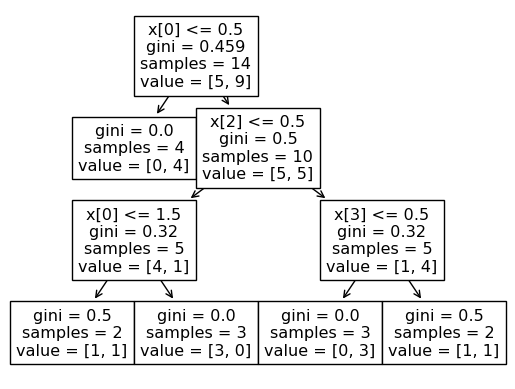

In [216]:
plot_tree(tree_model)

In [217]:
tree_model.predict(np.array([0, 0, 0, 0]).reshape(1, 4))

array(['yes'], dtype=object)

In [218]:
from sklearn.naive_bayes import GaussianNB

In [220]:
model = GaussianNB() 

In [221]:
model

GaussianNB()

In [222]:
model.fit(X, y)

GaussianNB()

In [223]:
model.predict(X)

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes'], dtype='<U3')

In [224]:
from sklearn import naive_bayes

In [225]:
dir(naive_bayes)

['ABCMeta',
 'BaseEstimator',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'Hidden',
 'Integral',
 'Interval',
 'LabelBinarizer',
 'MultinomialNB',
 'Real',
 'StrOptions',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 '_fit_context',
 'abstractmethod',
 'binarize',
 'check_is_fitted',
 'check_non_negative',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'warnings']